###Dataset Load

###Initial things

In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing


from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:ylabel='Class'>

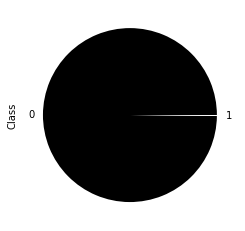

In [4]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [5]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

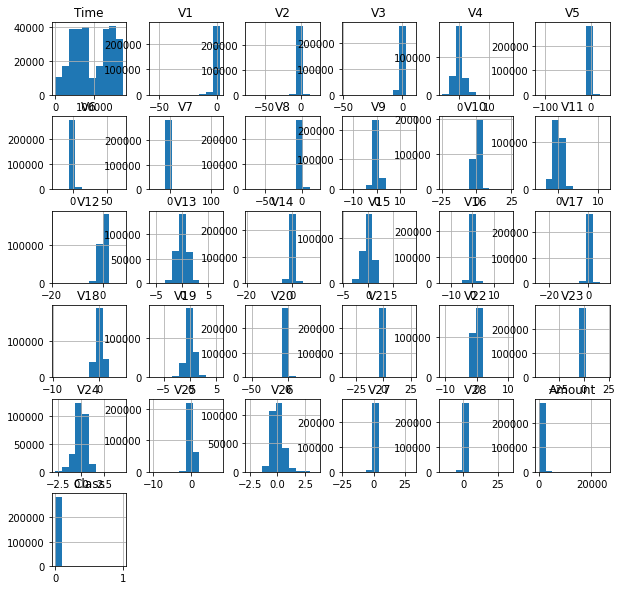

In [7]:
dataset.hist(figsize=(10, 10));

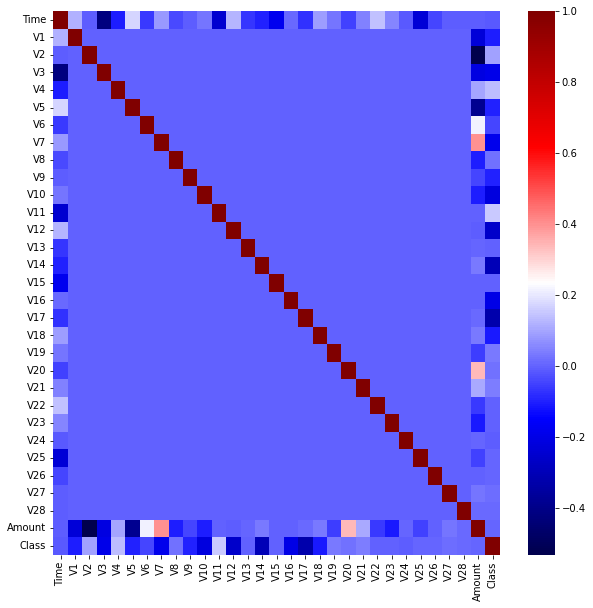

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [9]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [10]:
scores = []

In [11]:
names = ["LR", "RF", "XGBoost", "Ada Boost", "SGD", "NN(Supervised)", "DT", "GNB", "GB", "KNN", "VC", "SVM"]

In [12]:
preci = []
recall = []
f1 = []

### **Logistic** **Regression**

In [13]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [14]:
X = np.asarray(dataset.drop(columns='Class', axis = 1))
y = np.asarray(dataset['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)

In [15]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [16]:
#import time

#start_time = time.clock()
lr_clf = LogisticRegression(max_iter=300000).fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")


In [17]:
# accuracy on testing data
y_test_pred = lr_clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9990695551420246


In [18]:
print(confusion_matrix(y_test, y_test_pred))

[[56854    10]
 [   43    55]]


In [19]:
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


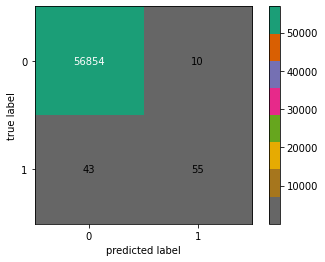

In [20]:
lr_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Random Forest

In [23]:
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(X_train, y_train)

y_test_pred = np.array(rf_clf.predict(X_test))

In [24]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9994557775359011


In [25]:
print(confusion_matrix(y_test, y_test_pred))

[[56860     4]
 [   27    71]]


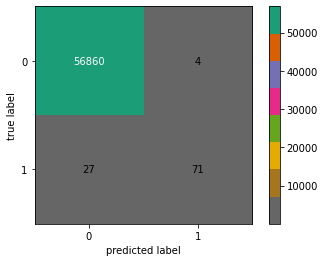

In [26]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.72      0.82        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Extreme Gradient Boosting (XGBoost)

In [29]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_test_pred = xgb_clf.predict(X_test)

In [30]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9995084442259752


In [31]:
print(confusion_matrix(y_test, y_test_pred))

[[56860     4]
 [   24    74]]


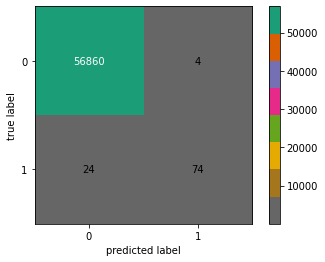

In [32]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Ada Boost

In [35]:
from sklearn import ensemble
# Creating classifier Object
adaboost_clf = ensemble.AdaBoostClassifier(n_estimators=300).fit(X_train, y_train)

In [36]:
y_test_pred = adaboost_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993679997191109


In [37]:
print(confusion_matrix(y_test, y_test_pred))

[[56851    13]
 [   23    75]]


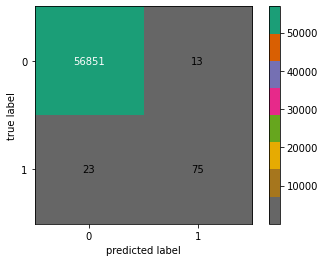

In [38]:
ab_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=ab_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)

In [43]:
y_test_pred = sgd_clf.predict(X_test)

In [44]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9989642217618764


In [45]:
print(confusion_matrix(y_test, y_test_pred))

[[56854    10]
 [   49    49]]


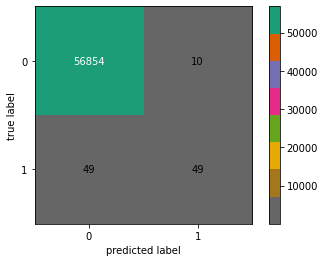

In [46]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.50      0.62        98

    accuracy                           1.00     56962
   macro avg       0.91      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [48]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Neural network models (supervised)

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)

In [51]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm= norm.transform(X_test)

In [52]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (50,5), random_state = 1, max_iter=300000)
nn_clf = nn_clf.fit(X_train_norm, y_train)

In [53]:
y_test_pred = nn_clf.predict(X_test_norm)

In [54]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9992802219023208


In [55]:
print(confusion_matrix(y_test, y_test_pred))

[[56849    15]
 [   26    72]]


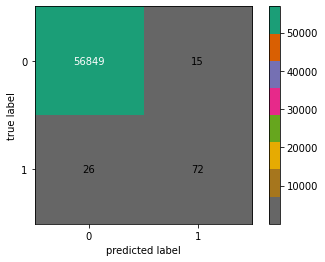

In [56]:
nn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=nn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
dt_clf = dt_clf.fit(X_train, y_train)

In [62]:
from collections import Counter

In [63]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({0: 227451, 1: 394})


In [64]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9992099996488887


In [65]:
print(confusion_matrix(y_test, y_test_pred))

[[56847    17]
 [   28    70]]


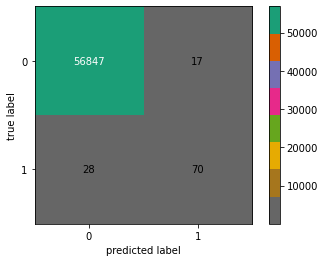

In [66]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [67]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.71      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gaussian Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb_clf = GaussianNB().fit(X_train, y_train)

In [71]:
y_test_pred = gnb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9933288859239493


In [72]:
print(confusion_matrix(y_test, y_test_pred))

[[56523   341]
 [   39    59]]


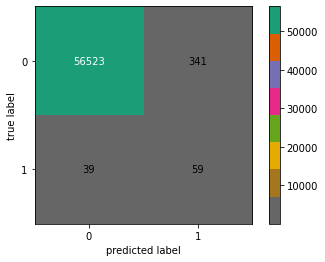

In [73]:
gnb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gnb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.60      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.62     56962
weighted avg       1.00      0.99      1.00     56962



In [75]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf = gb_clf.fit(X_train, y_train)

In [78]:
y_test_pred = gb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9990519995786665


In [79]:
print(confusion_matrix(y_test, y_test_pred))

[[56841    23]
 [   31    67]]


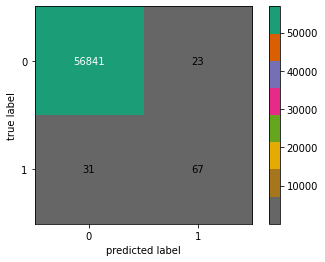

In [80]:
gb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [81]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.68      0.71        98

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [82]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### K-Nearest Neighbors(KNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({0: 227451, 1: 394})


In [85]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train_norm, y_train)

In [86]:
y_test_pred = knn_clf.predict(X_test_norm)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.999403110845827


In [87]:
print(confusion_matrix(y_test, y_test_pred))

[[56858     6]
 [   28    70]]


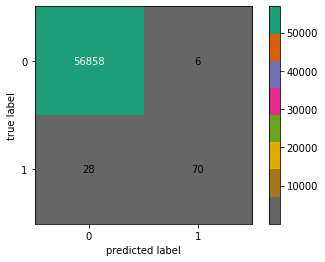

In [88]:
knn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=knn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [89]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [90]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [91]:
from sklearn.metrics import precision_recall_fscore_support

###Voting Classifier

In [92]:
from sklearn.ensemble import VotingClassifier

In [93]:
labels = ["Logistic Regression", "Xgboost", "Supervised NN"]

In [94]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier (estimators = [('nn', nn_clf),('xgboost', xgb_clf), ('RF', rf_clf) ],
voting='soft')
    
voting_clf.fit(X_train,y_train)

In [96]:
y_test_pred = voting_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9994733330992591


In [97]:
print(confusion_matrix(y_test, y_test_pred))

[[56862     2]
 [   28    70]]


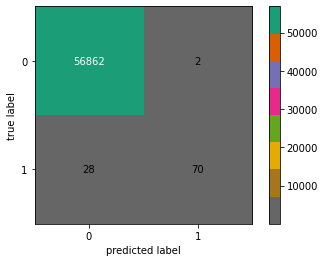

In [98]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [99]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [100]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Support vector machine(SVM)

In [101]:
from sklearn.svm import LinearSVC

In [102]:
svm_clf = svm.SVC(kernel='linear', gamma = 'auto', C = 2, probability=True).fit(X_train, y_train)

In [103]:
y_test_pred = svm_clf.predict(X_test)

In [104]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9985428882412837


In [105]:
print(confusion_matrix(y_test, y_test_pred))

[[56850    14]
 [   69    29]]


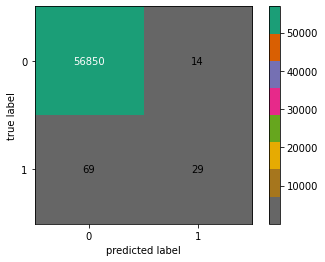

In [106]:
svm_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=svm_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [107]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.30      0.41        98

    accuracy                           1.00     56962
   macro avg       0.84      0.65      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [108]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### Result

In [109]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [110]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,LR,99.910000
1,RF,99.950000
2,XGBoost,99.950000
3,Ada Boost,99.940000
4,SGD,99.900000
5,NN(Supervised),99.930000
6,DT,99.920000
7,GNB,99.330000
8,GB,99.910000
9,KNN,99.940000


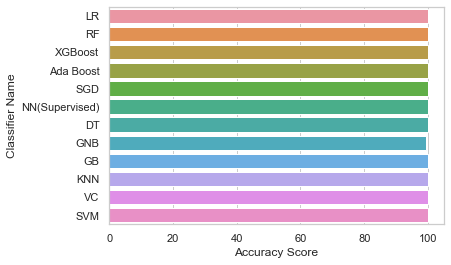

In [111]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

###ROC Curve

In [112]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_clf.predict_proba(X_test)
rf_probs = rf_clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)
adaboost_probs = adaboost_clf.predict_proba(X_test)
sgd_probs = sgd_clf.predict_proba(X_test)
nn_probs = nn_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gnb_probs = gnb_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
voting_probs = voting_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)

In [113]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]
sgd_probs = sgd_probs[:, 1]
nn_probs = nn_probs[:, 1]
dt_probs = dt_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
gb_probs = gb_probs[:, 1]
knn_probs = knn_probs[:, 1]
voting_probs = voting_probs[:, 1]

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

In [115]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
voting_auc = roc_auc_score(y_test, voting_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [116]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (gnb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.916
Naive Bayes: AUROC = 0.961


In [117]:
type(lr_probs)

numpy.ndarray

In [118]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

In [119]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

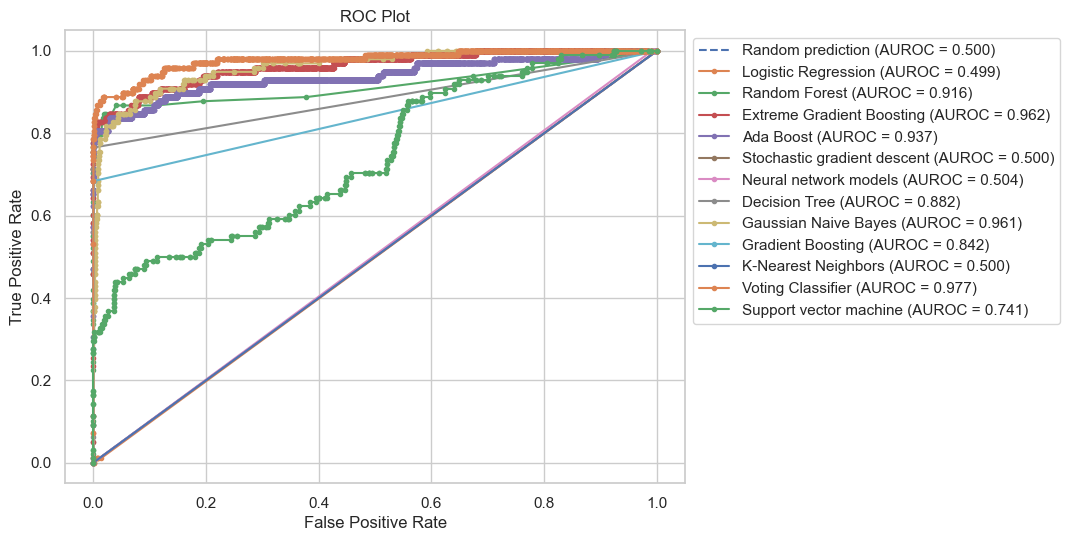

In [120]:
figure(figsize=(8, 6), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Extreme Gradient Boosting (AUROC = %0.3f)' % xgb_auc)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Ada Boost (AUROC = %0.3f)' % adaboost_auc)
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='Stochastic gradient descent (AUROC = %0.3f)' % sgd_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural network models (AUROC = %0.3f)' % nn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier (AUROC = %0.3f)' % voting_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support vector machine (AUROC = %0.3f)' % svm_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # 
# Show plot
plt.show()

###Precision Recall f1 score

In [121]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [122]:
x = np.arange(len(names))
width = 0.35

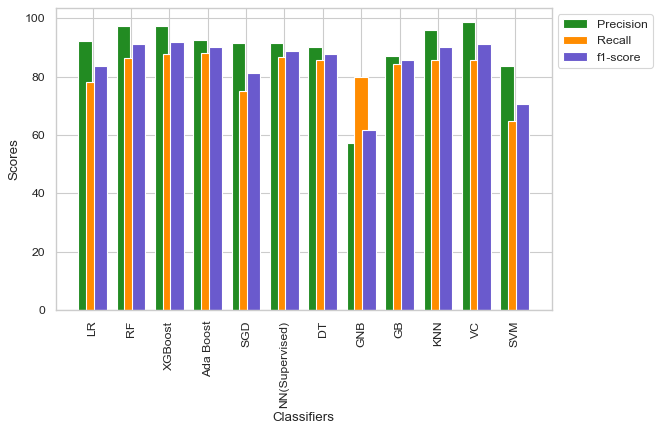

In [123]:
plt.figure(figsize=(8,5), dpi=80)
plt.bar(x-0.2, preci, width, color='forestgreen')
plt.bar(x, recall, width, color='darkorange')
plt.bar(x+0.2, f1, width, color='slateblue')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [124]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [125]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,LR,99.91,92.27,78.05,83.72
1,RF,99.95,97.31,86.22,91.03
2,XGBoost,99.95,97.41,87.75,92.03
3,Ada Boost,99.94,92.59,88.25,90.31
4,SGD,99.9,91.48,74.99,81.18
5,NN(Supervised),99.93,91.36,86.72,88.9
6,DT,99.92,90.21,85.7,87.82
7,GNB,99.33,57.34,79.8,61.68
8,GB,99.91,87.19,84.16,85.61
9,KNN,99.94,96.03,85.71,90.21
